# Introduction to Machine Learning

### 04/03/21
### Hosted by and maintained by the [Student Association for Applied Statistics (SAAS)](https://saas.berkeley.edu). Authored by [Andrew Rall](andrewr0498@berkeley.edu).

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import ipympl
%matplotlib inline

import random
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LogisticRegression
from sklearn.metrics import confusion_matrix
from imageio import imread, imsave

## 1. What is Machine Learning?

The term *machine learning* was coined in 1959 by computer scientist Arthur Samuel after his work on creating a checker playing program. Samuel defined machine learning as:

> "a field of study that gives computers the ability to learn without being explicitly programmed"

Although this quote is likely misattributed, it still serves as a good baseline definition, despite being overly abstract and ambiguous. However, Samuel's work in 1959 is by no means the moment in time at which machine learning was "invented". The least squares method, one of the most common methods of data fitting in machine learning, was discovered over 150 years prior in 1805 by Adrien-Marie Legendre.

Some of theory and methods behind machine learning have been around for decades, so why is it so popular now?
- Abundance of data (cloud storage)
- Abundance of computing power (advancements in GPUs)
- Money (companies have been able to make the above two profitable)

Machine Learning is an evolving field, it has been for nearly a century and will continue to evolve for the foreseeable future. Despite this, there are some commonalities in how machine learning is used today:

<img src='./images/ml_steps.png' width=800, height=800>


As you can see, there is more to machine learning than just using some sophisticated learning algorithm, but that is without a doubt at the core of the machine learning process. The 7 steps above are a good summary, but remember that the machine learning process is **not** one-directional, it resembles more of a cycle. We will look into what that means later in this notebook.

## 2. Yeah, but what IS Machine Learning?

The background information and definitions above are still kind of ambiguous. Let's do a better job at concretely understanding the foundation of modern machine learning.

If you've taken Data 100, you have likely seen this image or an image like the one below. It's not perfect, for example you may eventually come across a semi-supervised learning problem, but it's a good start so take a few minutes to really understand everything in it.

<img src='./images/ml_taxonomy.jpg' width=800, height=600>


### 2.1 Demo: "Photoshop" a Tennis Ball into St. Peter's Basilica

Before we get started with today's content, let's take a look at an awesome application of the exact same linear regression algorithm that you will be learning later today! Note, this problem was taken from Fall 2019 CS189 HW4.

Imagine that we have a picture of a tennis ball, a picture of [St. Peter's Basilica](https://en.wikipedia.org/wiki/St._Peter%27s_Basilica), and then a picture of a mirrored ball that was placed in the church at the spot from which the picture was taken.

<img src='./images/tennis.png' width=200, height=600>

<img src='./images/interior.jpg' width=400, height=600>

<img src='./images/stpeters_probe_small.png' width=300, height=600>

Below I use linear regression to adjust the lighting of the tennis ball such that it "fits in" with the rest of St. Peter's Basilica. Feel free to check out the code in tennis_ball_ols.py, you'll notice that most of the code in the file are just image processing functions.

Run the cell below, and when prompted enter "original" to display a plot of our tennis pasted on top of the image of the church.

Original image or use OLS to adjust lighting?
Type "original" or "OLS":
original


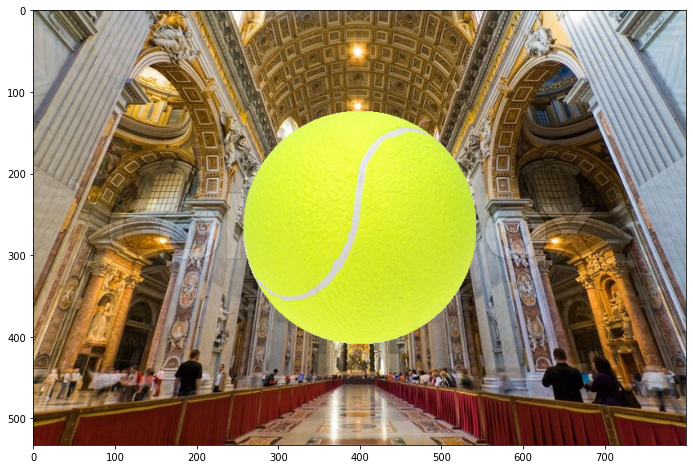

<Figure size 432x288 with 0 Axes>

In [7]:
%run ./code/tennis_ball_ols.py

Now enter "OLS" when prompted to see how OLS can adjust the lighting of the tennis ball.

In [9]:
%run ./code/tennis_ball_ols.py

KeyboardInterrupt: 

## 3. Linear Regression

I adamantly believe that linear regression is the foundation of much of machine learning. If you've taken Data 8 you probably have a basic understanding of linear regression, but it's important that we take the time to **really** understand what's going on when we talk about linear regression as a machine learning algorithm.

The goal of linear regression is to **predict** a *response* variable from one or more *explanatory* variables.

Hopefully you know the equation of a line from middle school algebra, $y = mx + b$, but there's a more "adult" formulation of linear regression that allows us to predict $y$ from more than just one $x$ variable. 

---

***But first a little review from two weeks ago:***

When we have **one** explanatory variable that we want to use to try to predict our response variable, we can use the following formulation:

$$y = \theta_0 + \theta_1x$$

Now we want to find the values of $\theta_0$ and $\theta_1$ that minimize the sum of squared residuals, or RSS:

$$\textit{RSS} = \sum_{i=0}^n {e_i}^2 = \sum_{i=0}^n (y_i - (\theta_0 + \theta_1x_i))^2$$

The proof was linked in lecture 4, but it turns out that the optimal values of $\theta_0$ and $\theta_1$ are:

$$\begin{aligned}
\hat{\theta_0}&=\bar {y}-\hat{\theta_1}\,{\bar{x}},\\
\hat{\theta_1}&=\frac{\sum _{i=1}^{n}(x_{i}-\bar{x})(y_{i}-\bar {y})}{\sum _{i=1}^{n}(x_{i}-\bar{x})^2}\\
\end{aligned}$$

From now on I will be representing our model coefficients using $\boldsymbol{\beta}$ instead of $\boldsymbol{\theta}$. Sometimes you will also see them called $\textbf{w}$.

---

***Now back to today's lecture:***

Assume we have a dataset with **n** rows and **d** columns. There is an actual implementation of linear regression later in this notebook, but first we need to establish the math behind the scenes:

$$ y_i = \beta_0 + \beta_1x_{i1} + \dots + \beta_dx_{id} + \epsilon_i$$

$$for \space\space i = 1, ..., n$$

We can then stack these equations together and write them in matrix form:

$$ y = X\beta + \epsilon$$

Where:

$$ y = \begin{bmatrix} y_1\\ y_2\\ y_3\\ \vdots \\ y_n \end{bmatrix}$$

$$ X = \begin{bmatrix}
1&x_{11}&\dots&x_{1d}\\
1&x_{21}&\dots&x_{2d}\\
\vdots&\vdots&\ddots&\vdots\\
1&x_{n1}&\dots&x_{nd}\\
\end{bmatrix}$$

$$ \beta = \begin{bmatrix} \beta_0\\ \beta_1\\ \beta_2\\ \vdots \\ \beta_d \end{bmatrix}$$

And our error term $\epsilon$ is a vector in $\mathbb{R}^n$ that adds "noise" to our linear relationship.

Now that we have our data, we want to find the values of the vector $\beta$ that help us predict $y$ the best. In other words, we want to find the weights that we place on each column (or feature) of our data $X$, that minimize the difference between our actual values of $y$ and our predicted values $\hat{y}$.

One method to find our optimal weights (or coefficients) $\beta$ is known as Ordinary Least Squares (OLS). There are a number of assumptions necessary for OLS, but for the purposes of this notebook we can just assume that all assumptions are met.

<img src='./images/linear_regression.png' width=400, height=600>

---

We can use OLS to minimize the sum of squared residuals. The solution to OLS is given by the equation: <br>
$$ \hat{\beta}_{OLS} = (X^TX)^{-1}X^Ty$$ <br>
where $$\hat{\beta}_{OLS}$$ is the vector of the coefficients of each feature.

(If you're interested in how we derived this equation, you can find it at the end of this lesson.)

It turns out that the inverse in the equation above is sometimes hard or even impossible to compute (what would be some cases where it's impossible?). As a result, even though linear regression has a closed form solution, sometimes an algorithm like gradient descent (covered later) is used to find the optimal values of $\beta$.

### 3.1 Example Using Closed Form Solution

In [10]:
# Load data
mpg = pd.read_csv("./data/mpg.csv", index_col="name") 

# Remove rows that have missing horsepower
mpg = mpg.loc[mpg["horsepower"] != '?'].astype(int) 

# Train, test split
mpg_train, mpg_test = train_test_split(mpg, 
                                       test_size = .2, 
                                       random_state = 0) 

# Train, validation split
mpg_train, mpg_validation = train_test_split(mpg_train, 
                                             test_size = .25, 
                                             random_state = 0)

# Notice that the splitting above creates a 60/20/20 split
mpg_train.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
name,,,,,,,,
plymouth satellite sebring,18,6,225,105,3613,16,74,1
vw rabbit,29,4,90,70,1937,14,76,2
dodge coronet custom,15,8,318,150,3777,12,73,1
plymouth reliant,27,4,135,84,2490,15,81,1
vw rabbit c (diesel),44,4,90,48,2085,21,80,2


Notice how in the cell above I perform a 60/20/20 split on our dataset, creating a training set, validation set, and testing set. This is a crucial step to all machine learning algorithms. Use the training set to "create" your model, the validation set to do a quick check of performance and then go back to tune your model, and use the test set to come up with your final evaluation metrics. We will be looking at a commonly used validation procedure later on.

<img src='./images/train_val_test.png' width=400, height=600>

Now let's try to predict the mpg of a car from the following features:
 - number of cylinders
 - displacement
 - horsepower
 - weight
 - acceleration
 - model_year
 - origin

In [11]:
mpg_train_with_intercept = mpg_train.copy()

# Add intercept term to training set
mpg_train_with_intercept.insert(1, "intercept", np.ones(mpg_train.shape[0]))

# Obtain our data matrix X and response vector y
X_train = np.asmatrix(mpg_train_with_intercept.iloc[:, 1:])
y_train = np.array(mpg_train.iloc[:, 0])

print(X_train.shape)
print(y_train.shape)

(234, 8)
(234,)


In [12]:
X_train

matrix([[  1.,   6., 225., ...,  16.,  74.,   1.],
        [  1.,   4.,  90., ...,  14.,  76.,   2.],
        [  1.,   8., 318., ...,  12.,  73.,   1.],
        ...,
        [  1.,   8., 302., ...,  12.,  78.,   1.],
        [  1.,   4.,  97., ...,  21.,  73.,   2.],
        [  1.,   8., 318., ...,  13.,  78.,   1.]])

In [13]:
# Use the formula above to obtain our estimate of beta
beta_hat_ols = np.linalg.inv(np.transpose(X_train) @ X_train) @ np.transpose(X_train) @ y_train
beta_hat_ols = beta_hat_ols.reshape(8, 1)
beta_hat_ols = np.asarray(beta_hat_ols).flatten()
beta_hat_ols

array([-1.44002965e+01, -1.89305414e-01,  2.00332299e-02, -6.73219101e-03,
       -7.87176662e-03,  2.35769833e-01,  7.10375016e-01,  8.97463586e-01])

Great! Now that we have obtained our estimates of $\beta$ using the OLS closed form solution, let's find an easier way to reach that point using Scikit-learn!

**Exercise:** What are the purposes of the training, validation and test sets?

### 3.2 Example Using Scikit-learn

In [14]:
from sklearn.linear_model import LinearRegression

# Initialize a linear model
# I set the fit intercept to true so that the coefficients match
linear_model = LinearRegression(fit_intercept=True)

# Fit linear model
X_train = np.asmatrix(mpg_train.iloc[:, 1:])
linear_model = linear_model.fit(X_train, y_train)

beta_hat_sklearn = np.append(np.array(linear_model.intercept_),linear_model.coef_)
beta_hat_sklearn

array([-1.44002965e+01, -1.89305414e-01,  2.00332299e-02, -6.73219101e-03,
       -7.87176662e-03,  2.35769833e-01,  7.10375016e-01,  8.97463586e-01])

In [15]:
beta_hat_ols

array([-1.44002965e+01, -1.89305414e-01,  2.00332299e-02, -6.73219101e-03,
       -7.87176662e-03,  2.35769833e-01,  7.10375016e-01,  8.97463586e-01])

In [16]:
np.allclose(beta_hat_sklearn, beta_hat_ols)

True

Awesome! When we fit a linear regression model using Scikit-learn, the coefficients that we obtain match almost exactly to the coefficients obtained by the OLS closed form solution.

### 3.3 Evaluating a Regression Model

Determining the effectivness of your regression model is actually a very nuanced problem. But for the purposes of this notebook we will only look at two metrics: the Mean Squared Error and the Coefficient of Determination (or $R^2$).

<img src='./images/mse.png' width=200, height=400>


The Mean Squared Error is given by the formula above and the Coefficient of Determination can be interpreted as the *proportion* of variance in your response variable that is captured by your explanatory variables.

Let's evaluate the linear regression model that we created above (note that it doesn't matter whether we choose Scikit-learn's $\beta$ estimates or the OLS closed form estimates since they're the same).

In [17]:
mpg_val_with_intercept = mpg_validation.copy()

# Add intercept term to training set
mpg_val_with_intercept.insert(1, "intercept", np.ones(mpg_validation.shape[0]))

# Create validation data matrix and response vector 
X_val = np.asmatrix(mpg_val_with_intercept.iloc[:, 1:])
y_val = np.array(mpg_validation.iloc[:, 0])

print(X_val.shape)
print(y_val.shape)

(79, 8)
(79,)


In [18]:
# Predict values of validation set response vector using data from validation set and our estimate of beta
y_val_pred = X_val @ beta_hat_ols
y_val_pred = np.asarray(y_val_pred.flatten())[0]
y_val_pred.shape

(79,)

In [19]:
y_val_pred

array([23.44528755,  7.75800302, 11.27642483, 16.76823542, 16.3822108 ,
       29.12439256, 13.40232048, 21.82511957, 16.06409951, 19.35473151,
       26.33874147, 24.69179273, 22.78363837, 29.77034306, 25.75348594,
       30.08636342,  4.62286602, 14.54796527, 27.51392049, 25.56430594,
       26.24808165, 26.43405289, 11.21585135, 26.51837176, 21.27121947,
       28.56326672, 34.31177612,  7.71386162, 13.80801921, 12.00571625,
       21.09831398, 22.57107808, 29.17616249, 17.19236956, 35.27336879,
       23.86711296, 29.44020508, 26.26394786,  6.49442128, 23.75003764,
       21.12512145,  9.9210674 , 35.22611713, 13.46436168, 28.29341201,
       15.19962305, 29.06284908, 23.60487327, 30.55441189, 36.21201715,
       19.97482815, 29.50209212, 22.87069206, 25.62264542, 25.13785084,
       18.03817183, 15.91591212, 24.6054909 , 31.03296163, 25.13617163,
        9.83448256, 27.66806965, 10.8841866 , 29.30043826, 20.76852738,
       11.75149887, 28.77004769, 28.70145287, 17.21888627, 20.37

In [20]:
# Calculate residuals
residuals_closed_form = y_val - y_val_pred
residuals_closed_form.shape

(79,)

In [21]:
# Calculate Mean Squared Error on Validation Set
mse_ols = np.mean((residuals_closed_form)**2)
mse_ols

13.04159924132512

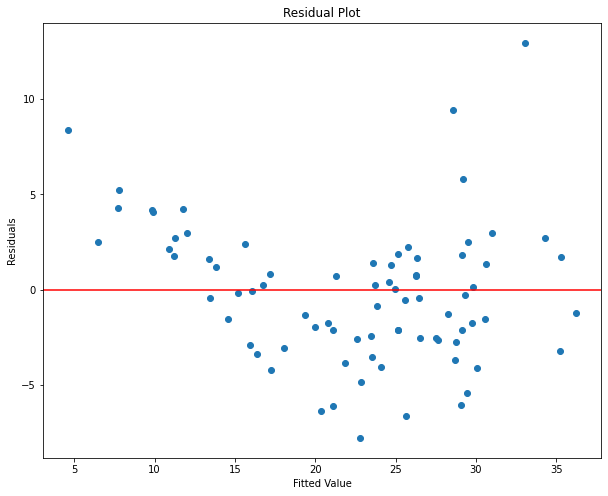

In [22]:
fig, ax = plt.subplots(figsize=(10, 8))

plt.scatter(y_val_pred, residuals_closed_form)
plt.axhline(y=0, color='r', linestyle='-')
plt.title("Residual Plot")
plt.xlabel("Fitted Value")
plt.ylabel("Residuals");

There appears to be a slight trend in our residual plot (it's not just a formless blob). This indicates that the model we chose might not be best suited for this problem.

In [23]:
# Finally, the R^2 Score
X_val = np.asmatrix(mpg_validation.iloc[:, 1:])

r_squared_ols = linear_model.score(X_val, y_val)
r_squared_ols

0.7715217891827842

**Exercise:** Interpret the $r^2$ value above.

## 4. Polynomial Regression

Let's try plotting MPG against Displacement. What does the plot look like to you? Maybe we should try using polynomial regression to model this relationship. 

Polynomial regression is nothing but linear regression on a polynomial feature set. 

For example, if we're regressing on some column $X$, and we perform polynomial regression of degree 2, then our new feature matrix will include three columns: 
 - $X^0$ (a column of 1's)
 - $X^1$ (our original $X$)
 - $X^2$

Let's take a look at what this means.

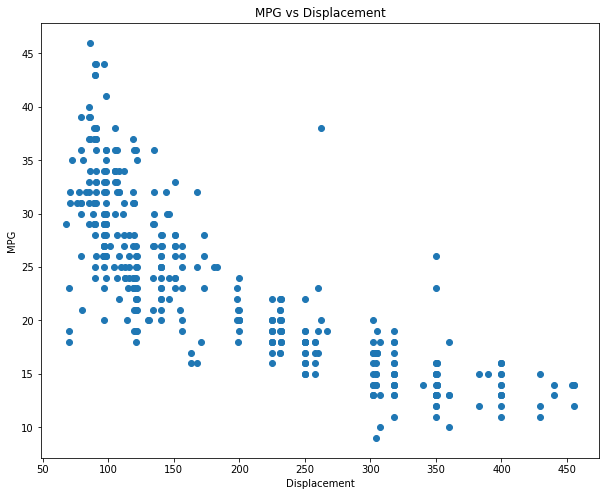

In [24]:
fig, ax = plt.subplots(figsize=(10, 8))

plt.title("MPG vs Displacement")
plt.xlabel("Displacement")
plt.ylabel("MPG")
plt.scatter(mpg.displacement, mpg.mpg);

In [25]:
# Create our data matrix X and response vector y that we will use for polynomial regression
X = np.transpose(np.asmatrix(mpg_train.displacement.values))
y = mpg_train.mpg.values

X[0:5]

matrix([[225],
        [ 90],
        [318],
        [135],
        [ 90]])

In [27]:
# Don't worry too much about the code in this cell, just try to undertand the plots below
def polynomial_regression(degree, X, y):
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(X)
    
    linear_model = LinearRegression()
    linear_model = linear_model.fit(X_poly, y)
    
    x_range = np.arange(min(np.asarray(X.flatten())[0]), 
                  max(np.asarray(X.flatten())[0]) + .001, .001).reshape((-1, 1))

    predicted = linear_model.predict(poly.fit_transform(x_range))
    
    fig, ax = plt.subplots(figsize=(10, 8))

    plt.title("Polynomial Degree " + str(degree) + " Model: MPG vs Displacement")
    plt.xlabel("Displacement")
    plt.ylabel("MPG")
    plt.plot(x_range, predicted, color='red')
    plt.scatter(mpg.displacement, mpg.mpg)
    return predicted, X_poly

### 4.1 Degree 0 Polynomial Regression

Our Feature Matrix, X:


,0
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


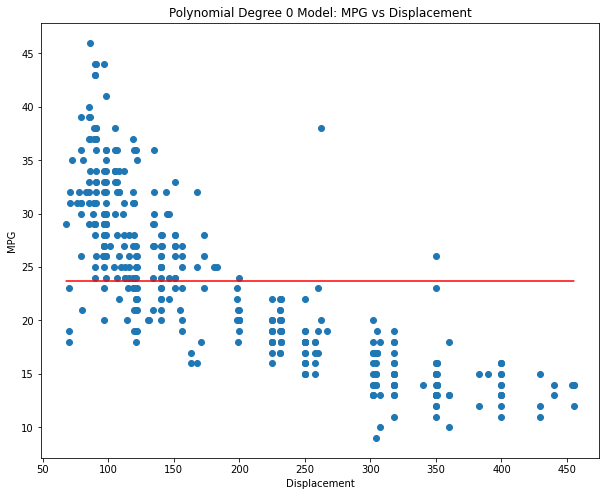

In [28]:
pred_poly_0, X_poly_0 = polynomial_regression(0, X, y)
print("Our Feature Matrix, X:")
pd.DataFrame(X_poly_0).head()

### 4.2 Degree 1 Polynomial Regression

Our Feature Matrix, X:


,0,1
0,1.0,225.0
1,1.0,90.0
2,1.0,318.0
3,1.0,135.0
4,1.0,90.0


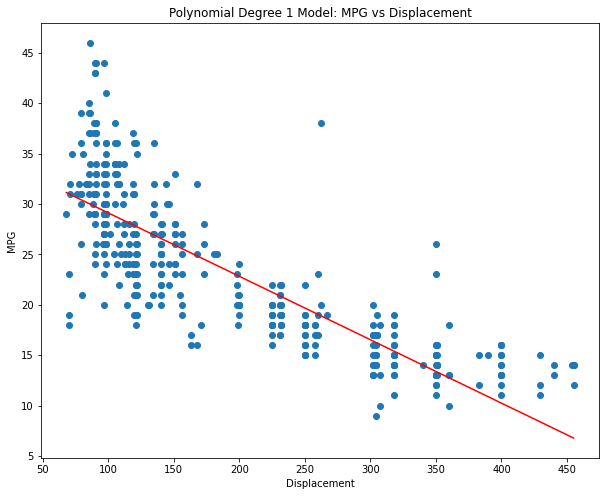

In [29]:
pred_poly_1, X_poly_1 = polynomial_regression(1, X, y)
print("Our Feature Matrix, X:")
pd.DataFrame(X_poly_1).head()

### 4.3 Degree 2 Polynomial Regression

Our Feature Matrix, X:


,0,1,2
0,1.0,225.0,50625.0
1,1.0,90.0,8100.0
2,1.0,318.0,101124.0
3,1.0,135.0,18225.0
4,1.0,90.0,8100.0


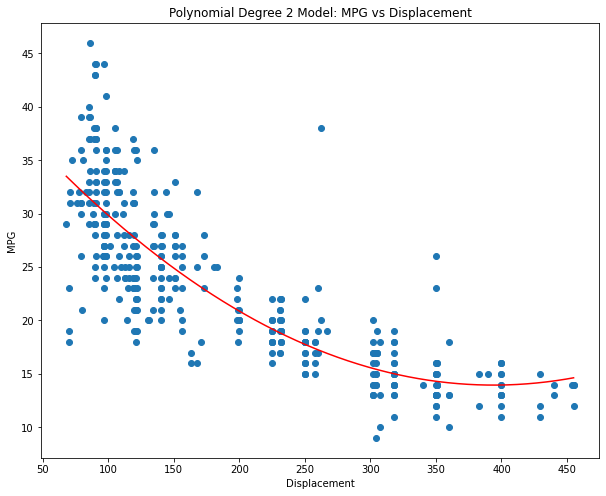

In [30]:
pred_poly_2, X_poly_2 = polynomial_regression(2, X, y)
print("Our Feature Matrix, X:")
pd.DataFrame(X_poly_2).head()

### 4.4 Degree 10 Polynomial Regression

Our Feature Matrix, X:


,0,1,2,3,4,5,6,7,8,9,10
0,1.0,225.0,50625.0,11390625.0,2.562891e+09,5.766504e+11,1.297463e+14,2.919293e+16,6.568408e+18,1.477892e+21,3.325257e+23
1,1.0,90.0,8100.0,729000.0,6.561000e+07,5.904900e+09,5.314410e+11,4.782969e+13,4.304672e+15,3.874205e+17,3.486784e+19
2,1.0,318.0,101124.0,32157432.0,1.022606e+10,3.251888e+12,1.034100e+15,3.288439e+17,1.045724e+20,3.325401e+22,1.057478e+25
3,1.0,135.0,18225.0,2460375.0,3.321506e+08,4.484033e+10,6.053445e+12,8.172151e+14,1.103240e+17,1.489375e+19,2.010656e+21
4,1.0,90.0,8100.0,729000.0,6.561000e+07,5.904900e+09,5.314410e+11,4.782969e+13,4.304672e+15,3.874205e+17,3.486784e+19


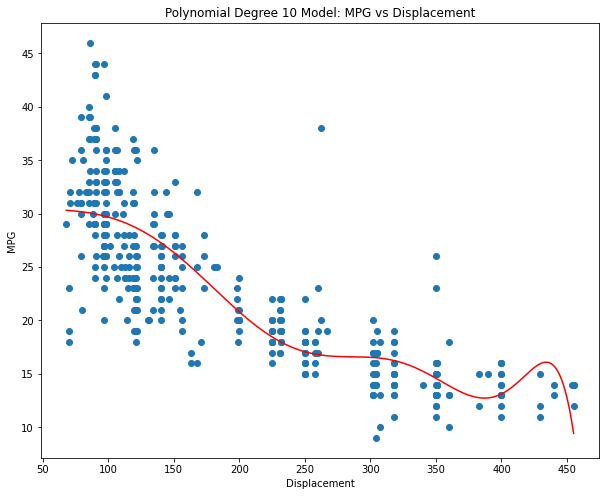

In [50]:
pred_poly_10, X_poly_10 = polynomial_regression(10, X, y)
print("Our Feature Matrix, X:")
pd.DataFrame(X_poly_10).head()

**Exercise:** What do you observe? What happens to our model as we increase the degree (and number) of polynomial features that we are adding to our model?

Is our model still linear?

## 5. Logistic Regression

Remember the Machine Learning Taxonomy tree diagram from the start? Well I hate to break it to you, but thus far we have only explored the leftmost left of the leftmost branch, regression.

Now we will jump over to it's sibling, classification.

The one classification algorithm that I will show you is called Logistic Regression. Kind of confusing right? I mean "regression" is in it's name. Well it turns out the Linear Regression and Logistic Regression are very closely related. In this notebook I am only going to explain and demo a **binary** classification problem but Logistic Regression can easily be extended to a multiclass classification problem.

To understand the difference let me introduce to you the sigmoid function:

### 5.1 The Sigmoid Function

<img src='./images/sigmoid.png' width=400, height=600>


The sigmoid function is what we will use to map predicted our predicted values to probabilities.

### 5.2 The Decision Boundary

Now that we have our predicted values represented as a probability (in the range 0 to 1), we can establish a decision boundary: a threshold value where if our predicted probability is below our threshold we predict 0 and if our predicted probability is above we predict 1.

This decision boundary is actually a parameter of our model that we can tune, but let's just set it equal to .5 for today.

### 5.3 Making Our Predictions

This part should sound very familiar. To obtain our predicted values for logistic regression, all we have to do is multiply our coefficients $\beta$ by our data $X$. Sticking with the notation in the plot above, our predicted values would be:

$$ z = \beta_0 + \beta_1x_1 + \beta_2x_2 + \dots + \beta_dx_d$$

Then to obtain our predicted probabilites (p) we just pass $z$ into the sigmoid function and obtain:

$$ p = \frac{1}{1+e^{-(\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_dx_d )}} $$

So if p is less than our decision boundary of .5 we predict 0 and if p is greater than our decision boundary we predict 1.

**Exercise:** Let's say for a particular data point, you have a value of $z = -.5.$ What would you predict for that point: $0$ or $1$?

### 5.4 Defining Our Cost Function

For the case of linear regression we used the sum of squared residuals as our cost function, but for logistic regression we need to use something else, the **Cross-Entropy Loss** (or Log Loss).

So instead of using:

$$L(\beta) = \sum_{i=1}^{n}(x_i^T\beta - y_i)^2 = \Vert X\beta - y\Vert_2^2$$ 

We need to use:

$$ L(\beta) = -\sum_{i=1}^{n}y_iln(p_i) + (1 - y_i)ln(1 - p_i)$$

where $p_i$ is the predicted probability from above of the ith row of our dataset and $y_i$ is the actual 0/1 label of the ith row. <br>

The intuition behind this loss function is that we want to penalize wrong answers the further off the mark they are. For example, the image below shows that if the true label is 1, an answer of 0 would result in the highest loss, while an answer of 9 would only be slightly penalized.

<img src='./images/cross_entropy.png' width=400, height=600>


### 5.5 Minimizing Our Cost Function

To minimize our cost function from above and find our optimal values of $\beta$ we have to use an algorithm like gradient descent because the logistic regression loss function does not have a closed form solution. 

For the purposes of this notebook we will skip how we can use gradient descent for logistic regression but I will give a brief overview and intuitive explanation of the algorithm later.

### 5.6 Logistic Regression in Scikit-learn

In [52]:
mpg_cat = pd.read_csv("./data/mpg_category.csv", index_col="name") 

# Encode OilExpensive such that 0 is inexpensive and 1 is expensive
mpg_cat["OilExpensive"] = (mpg_cat.OilExpensive == "expensive")*1
mpg_cat["Old?"] = (mpg_cat.loc[:, "Old?"] == "old")*1


# Train, test split
mpg_cat_train, mpg_cat_test = train_test_split(mpg_cat, 
                                       test_size = .2, 
                                       random_state = 0) 

# Train, validation split
mpg_cat_train, mpg_cat_validation = train_test_split(mpg_cat_train, 
                                             test_size = .25, 
                                             random_state = 0)

# Notice that the splitting above creates a 60/20/20 split
print("Unique Values of OilExpensive: " + str(mpg_cat.OilExpensive.unique()))
mpg_cat.head()

Unique Values of OilExpensive: [0 1]


,cylinders,displacement,horsepower,weight,acceleration,origin,OilExpensive,Old?
name,,,,,,,,
chevrolet chevelle malibu,8,307,130,3504,12,1,0,1
buick skylark 320,8,350,165,3693,11,1,0,1
plymouth satellite,8,318,150,3436,11,1,0,1
amc rebel sst,8,304,150,3433,12,1,0,1
ford torino,8,302,140,3449,10,1,0,1


In [54]:
X_train = np.asmatrix(mpg_cat_train.drop("OilExpensive", axis=1))
y_train = mpg_cat_train.OilExpensive.values

X_val = np.asmatrix(mpg_cat_validation.drop("OilExpensive", axis=1))
y_val = mpg_cat_validation.OilExpensive.values

In [55]:
%%capture
lr = LogisticRegression()
lr = lr.fit(X_train, y_train)
y_val_pred = lr.predict(X_val)

In [56]:
# The true labels of our validation set
y_val

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1])

In [57]:
# The labels we predicted for our validation set
y_val_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1])

**Exercise:** What kind of supervised learning is logisitic regression?

## 6. Gradient Descent

<img src='./images/foggy_hill.jpg' width=600, height=600>

I've mentioned the gradient descent algorithm a few times throughout this notebook as a method to minimize some cost function that we have and now it's finally time to take a look at it.

The basic idea is that we start at some random point x and then compute the derivative (or gradient) of our cost function at that point.

We then move in the direction of the gradient with fixed step size gamma and compute our new location x. 

The implication of this is that if the gradient is "steep" at the point we are standing at then our step size is going to cause us to take a big step down but if the gradient is close to 0 then we will only be taking a very small step. 

The algorithm converges once the movement from our old point x to our new point x is below some precision level. In other words, our steps become very small and we essentially get stuck.

<img src='./images/gradient_descent_plot.png' width=600, height=600>


Let's now look at an example where we use gradient descent to find the minimum of the function:

$$ f(x) = (x-5)^2 + x - 8$$

But before we start, let's do a little calculus review and tell me what the global minimum of $f(x)$ is.

In [58]:
def f(x):
    return (x - 5)**2 + x - 8

def df(x):
    return 2*x - 9

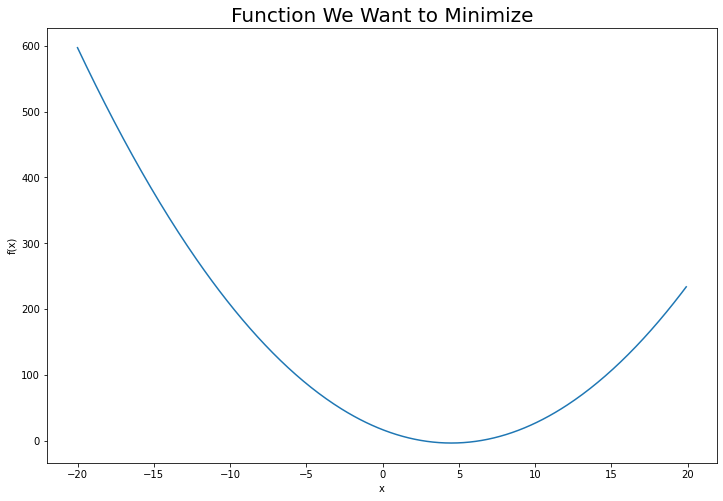

In [59]:
x_range = np.arange(-20, 20, .1)
y = f(x_range)

fig, ax = plt.subplots(figsize=(12, 8))
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Function We Want to Minimize", fontsize=20)
plt.plot(x_range, y);

In [60]:
# initialize random start point
initial_x = np.random.randint(-20, 20)

# initialize previous step size
prev_step_size = 1

# Step size
gamma = .01

# Precision for convergence
precision = 0.0001  

# Max number of iterations
max_iters = 10000  

# Step counter
iters = 0

curr_x = initial_x

while prev_step_size > precision and iters < max_iters:
    prev_x = curr_x 
    curr_x = curr_x - gamma * df(prev_x) 
    prev_step_size = abs(curr_x - prev_x)
    iters = iters + 1 
    #print("Iteration", iters, "\nX value is", curr_x) 
    
print("")
print("Our random start point was", initial_x)
print("There was convergence after", iters, "steps")
print("The global minimum occurs at", curr_x)


Our random start point was -6
There was convergence after 380 steps
The global minimum occurs at 4.495134829528141


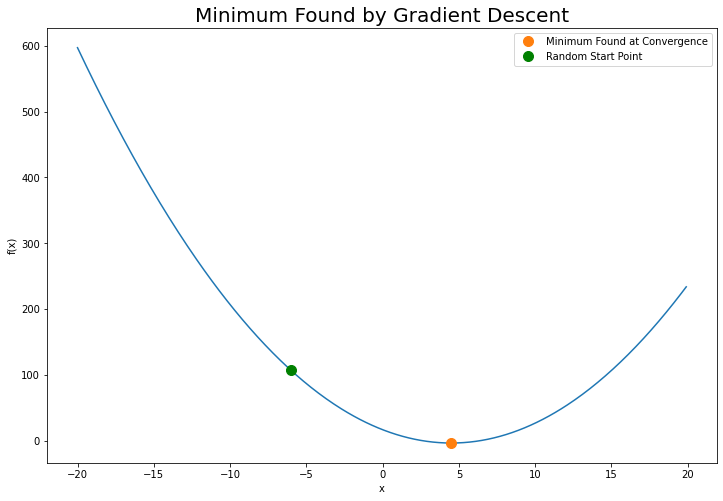

In [61]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Minimum Found by Gradient Descent", fontsize=20)
plt.plot(x_range, y)
plt.plot(curr_x, f(curr_x), 'o', markersize=10, label="Minimum Found at Convergence")
plt.plot(initial_x, f(initial_x), 'go', markersize=10, label="Random Start Point")
ax.legend();

Awesome! In the example above traditional gradient descent appears to have performed well for us because our function $f(x)$ is strictly convex. In fact there are a number of reasons why gradient descent may not work well, can you think of some? In practice, there are a number of [variations](https://towardsdatascience.com/gradient-descent-algorithm-and-its-variants-10f652806a3) of the basic gradient descent algorithm above that are used.

**Exercise:** Does gradient descent always converge to an optimum?


### (Optional) Derivation of Ordinary Least Squares


***Before we jump into OLS, a little bit of notation:***

Let:

$$ A = \begin{bmatrix} 3\\ -4\\ 5\end{bmatrix}$$

Then the L1 Norm of A is:

$$ \Vert A \Vert_1 = |3| + |-4| + |5| = 12$$

And the L2 Norm Squared of A is:

$$ \Vert A \Vert_2^2 = A^TA = (3)^2 + (-4)^2 + (5)^2 = 50$$

---

We can use OLS to minimize the sum of squared residuals:

$$\hat{\beta}_{OLS} = \underset{\beta}{\operatorname{argmin}} \Vert X\beta - y\Vert_2^2$$

Now how do we minimize this expression? Let us define our objective, [or cost function](https://stats.stackexchange.com/questions/179026/objective-function-cost-function-loss-function-are-they-the-same-thing), as:

$$ L(\beta) = \sum_{i=1}^{n}(y_i - x_i^T\beta)^2 = \Vert X\beta - y\Vert_2^2$$

First just rewrite this expression and FOIL.

$$ L(\beta) = (X\beta - y)^T(X\beta - y)$$

$$ = (X\beta)^T(X\beta) - (X\beta)^Ty - y^TX\beta + y^Ty $$

$$ = \beta^TX^TX\beta - 2\beta^TX^Ty + y^Ty$$

It can be proven that our objective function $L(\beta)$ is convex. This means that any critical point is a global minimum. So throwback to AP Calculus, what can we do?

$$ \nabla_\beta L(\beta) = \nabla_\beta (\beta^TX^TX\beta - 2\beta^TX^Ty + y^Ty)$$

$$ = \nabla_\beta(\beta^TX^TX\beta) - 2\nabla_\beta(\beta^TX^Ty) + \nabla_\beta(y^Ty)$$

$$ = 2X^TX\beta - 2X^Ty = 0$$

Thus,

$$ X^TX\hat{\beta}_{OLS} = X^Ty$$

$$ \hat{\beta}_{OLS} = (X^TX)^{-1}X^Ty$$

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=340b0b25-cd25-4a57-8617-5c5c7e1871b6' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>